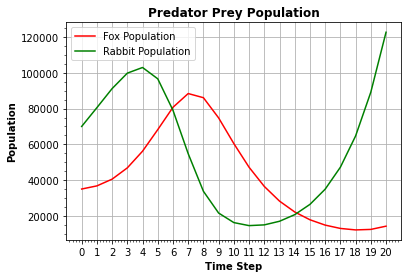

In [2]:
 """ ***Predator Prey Population Dynamics***
    ***Author - Will Duckworth***

This program explores the relationship between predator and prey populations
in nature. It is an investigation of a closed, uncontrolled study of the
population of predators and prey, and how the growth and decline
of both have a relational effect on each other.

The program takes in a starting popualation of predators and prey at time T=0.
It then uses the equation for calculating the predator population integrating
the prey population over time:

    In this example, Predator = Fox || Prey = Rabbit and can be used interchangeably
    with new variants of each.

    fox population at t=0: 35,000
    rabbit population at t=0: 70,000

    fox population equation: f(Xt+1) = (((C*Yt)-d)*Xt)+Xt

    In which: c = .000005
              d = .03
              f = .5
              g = .00001
              t = current time step 
              Y = the determinate variable of the rabbit population at time T=x
              X = the determinate variable of the fox population at T=x


    rabbit population equation: f(Yt+1) = ((f-(g*Xt))*Yt)+Yt

    In which:
              c = .000005
              d = .03
              f = .5
              g = .00001
              t = current time step
              X = the determinate variable of the fox population at time T=x
              Y = the determinate variable of the rabbit population at time T=x

Therefore, each population must be calculated in succession to produce the
correct set of dependant variables at t=x


"""

# Import the pyplot module from the matplotlib library, and datetime

from matplotlib import pyplot
from datetime import date

# Set the populations of both predator and prey variables for use
# in the equations, as well as implementing a list for each type of
# population and a global counter variable, giving the value at time T=0

predator_population, prey_population, counter, time_step = 35000, 70000, 0, 20
predator_population_list, prey_population_list = [predator_population], [prey_population]


# Define the function to calculate the predator population, giving access to
# the global variables instantiated at the beggining of the program.

def get_predator_population():
    """ 
    ***get_predator_population()***

    This function takes the equation for the predator population determined by
    the variable of the prey population at time T.
    It then appends the new calculated population to the predator list and
    updates the current predator population variable value
    """
    global prey_population, predator_population
    predator_calc = eval(f"(((.000005*{prey_population_list[counter]})-.3)*"
                         f"{predator_population})+{predator_population}")
    predator_population_list.append(predator_calc)
    predator_population = predator_calc


def get_prey_population():
    """ 
    ***get_prey_population()***

    This function takes the equation for the prey population determined by
    the variable of the predator population at time T.
    It then appends the new calculated population to the prey list and
    updates the current prey population variable value
    """
    global prey_population, counter
    prey_calc = eval(f"((.5-(.00001*{predator_population_list[counter]}))*"
                     f"{prey_population})+{prey_population}")
    prey_population_list.append(prey_calc)
    prey_population = prey_calc
    counter += 1


def data_to_file(predator_pop_list, prey_pop_list):
    """
    ***data_to_file(param, param)***

    :param predator_pop_list: predator list containing calculated populations over time period
    :param prey_pop_list: prey list containing calculated populations over time period

    Passing these two parameters, this function writes the data to a file line by line
    prepared with the time step value, and the population value on a new line to
    2 decimal places

    The date of the calculations is written in the header of both predator and prey,
    giving the information on when the file was written

    """

    time_step = 0
    with open("PredatorPreyPopulationDynamics.txt", "w+") as write_data:
        write_data.write(f"****Prey Population over time constructed on: {date.today()}****\n")
        for data in prey_pop_list:
            write_data.write('time step {} : {:.2f}'.format(time_step, data)+"\n")
            time_step += 1
        time_step = 0
        write_data.write(f"****Predator Population over time constructed on: {date.today()}****\n")
        for data in predator_pop_list:
            write_data.write('time step {} : {:.2f}'.format(time_step, data)+"\n")
            time_step += 1


# Utilise a for loop to call each function in succession
# for calculating, updating and appending the populations
# over the given time step period

for i in range(1, 21, 1):
    get_predator_population()
    get_prey_population()
    
# Call data_to_file to write the data for storage

data_to_file(predator_population_list, prey_population_list)

# Format graph to specifications using the pyplot module methods
# Finally, plot the graph and display

pyplot.title("Predator Prey Population", fontweight="bold")
pyplot.plot(predator_population_list, color="red", label="Fox Population")
pyplot.plot(prey_population_list, color="green", label="Rabbit Population")
pyplot.xlabel("Time Step", fontweight="semibold")
pyplot.ylabel("Population", fontweight="semibold")
pyplot.grid(visible=True), pyplot.minorticks_on()
pyplot.xticks(ticks=[i for i in range(21)])
pyplot.legend()
pyplot.show()


Number of experiments: 10000



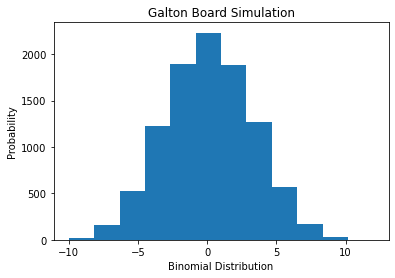

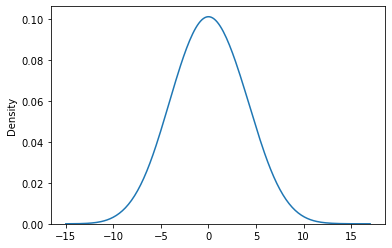

In [1]:
"""" ***Galton Board Binomial Distribution Simulator***
       ***Author - Will Duckworth***
     ***COSC102 Trimester 2, 7/2022***

Python class for simulating a 12 bin Galton Board distribution
Use this class to create an object which has in built methods
of running a Galton Board simulation for binomial distribution
probability, as well as creating a distribution histogram and
plotting a Gaussian formatted kernel density graph.
The class has a method to write the data collected from the
experiments to file auto dated.
"""

# Import dependant libraries for graphs and random
# uniform numbers, as well as timestamps
import random, datetime, seaborn
from matplotlib import pyplot


# class framework
class BinomialDistribution:
    # number of experiments, n(number of bins), experiment range,
    # and p(left/right probability scalar), set by default
    def __init__(self, experiment_range=10000, n=12, p=.5):
        self.no_of_trials = experiment_range
        self.trials = [0 for i in range(1, self.no_of_trials + 1, 1)]
        self.n = n
        self.p = p

    # This method runs the simulation given(n,p,experiment_range)
    def galton_board_simulation(self):
        """
            ***galton_board_simulation()***
              ***Called from object***

        This method runs the simulation given (n,p,experiment_range)
        for the probability p. The variable r is created as a random
        number using a random seed value producing a number between
        0 and 1. If r > p, the distribution is to the right(trials[iter]+1),
        if r < p, the distribution is to the left(trials[iter]-1).
        There is a callback to write_data_to_file so the user does not have
        a need to save the data after each experiment. This is done for
        each instance, and each call to the method.
        """

        for experiment in range(self.no_of_trials):
            for i in range(self.n):
                r = random.uniform(0, 1)
                if r > self.p:
                    self.trials[experiment] += 1
                else:
                    self.trials[experiment] -= 1
        self.trials = sorted(self.trials)
        print(f"Number of experiments: {self.no_of_trials}\n"
              f"")
        self.write_experiments_to_file()

    # Write data to a file, if it does not exist, it creates
    # a new file.
    def write_experiments_to_file(self):
        """
            ***write_experiments_to_file***
        ***Called from galton_board_simulation***

        Write data to a .txt file opened with read/write
        permissions. The data is the ordered list that matches
        the distribution centered around 0 (sorted(trials)).
        It is auto set with a heading, included variables
        and their values used with each experiment. The file is
        time stamped and is written line by line. Callback
        to plot_histogram()

        """
        with open("trials.txt", "w+") as data_writer:
            data_writer.write(f" Galton Board Simulator {datetime.date.today()}\n"
                              f"Variables: n = {self.__dict__.get('n')}"
                              f" p = {self.__dict__.get('p')} :"
                              f"Number of Experiments = {self.__dict__.get('no_of_trials')}")
            for data in self.trials:
                data_writer.write(str(data) + "\n")
            self.plot_histogram()

    # Visual plot of the results of the experiments
    def plot_histogram(self):
        """
            ***plot_histogram***
        ***Called from write_data_to_file***

        Plots the histogram of the experiments from the
        simulation. Title, x and y label are set to display
        chart information for readability. Bins is set to
        12 to give a uniform distribution for trials over
        length 5000.
        Call to plot_kde()
        """
        pyplot.hist(self.trials, bins=12, histtype="stepfilled")
        pyplot.title("Galton Board Simulation")
        pyplot.xlabel("Binomial Distribution")
        pyplot.ylabel("Probability")
        pyplot.show()
        self.plot_kde()

    # Create kernel density estimate graph
    def plot_kde(self):
        """
            ***plot_kde***
            ***Called from plot_histogram***

        Creates a kde graph using the kdeplot() method
        from the Seaborn library. Trials is passed in by
        default for the data set, and the bandwidth is
        adjusted to 3 to give a normalised graph.
        The function returns, clearing the stack frame.
        """
        seaborn.kdeplot(data=self.trials, bw_adjust=3)
        return


exp1 = BinomialDistribution(experiment_range=10000)

exp1.galton_board_simulation()
